In [37]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.2f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col='공고게시일자')

In [2]:
# df['공고게시일자'] = df['공고게시일자'].astype(str)

# df['공고게시일자'] = pd.to_datetime(df['공고게시일자'])

# df['입찰계약방법축소'] = df.입찰계약방법.str.split('(').str[0]

# #df['week']=df['공고게시일자'].dt.week

# df['Month'] = df['공고게시일자'].dt.month
# df['YEAR'] = df['공고게시일자'].dt.year 

In [3]:
#water_summary = df[df.수요기관명 == "한국수자원공사"] # 용역이 젤 많은 
seoul_city = df[df.수요기관명 == "서울특별시"] # 용역
#Highway = df[df.수요기관명 =="한국도로공사"] # 용역


df.수요기관명.value_counts()
#seoul_city

방위사업청              62468
한국수자원공사            13366
서울특별시              11746
한국도로공사              9715
서울교통공사              8109
                   ...  
청도유통영농조합법인             1
대한민국줄넘기협회              1
한국예탁결제원 총무2팀           1
주식회사 주스                1
경상남도통영교육청 한산중학교        1
Name: 수요기관명, Length: 28543, dtype: int64

In [38]:
#water_summary_service = water_summary[water_summary.대상 == "용역"]
seoul_city_service = seoul_city[seoul_city.대상 == "용역"]
#Highway_service = Highway[Highway.대상 == "용역"]

In [39]:
seoul_city_service_price.dtypes

추정가격           float64
date    datetime64[ns]
dtype: object

In [40]:
col_name = ["추정가격"]
seoul_city_service_price = pd.DataFrame(data = seoul_city_service,columns = col_name)

In [41]:
seoul_city_service_price=seoul_city_service_price.sort_index(ascending=True)

Text(0.5, 1.0, '서울특별시 용역 추정가격')

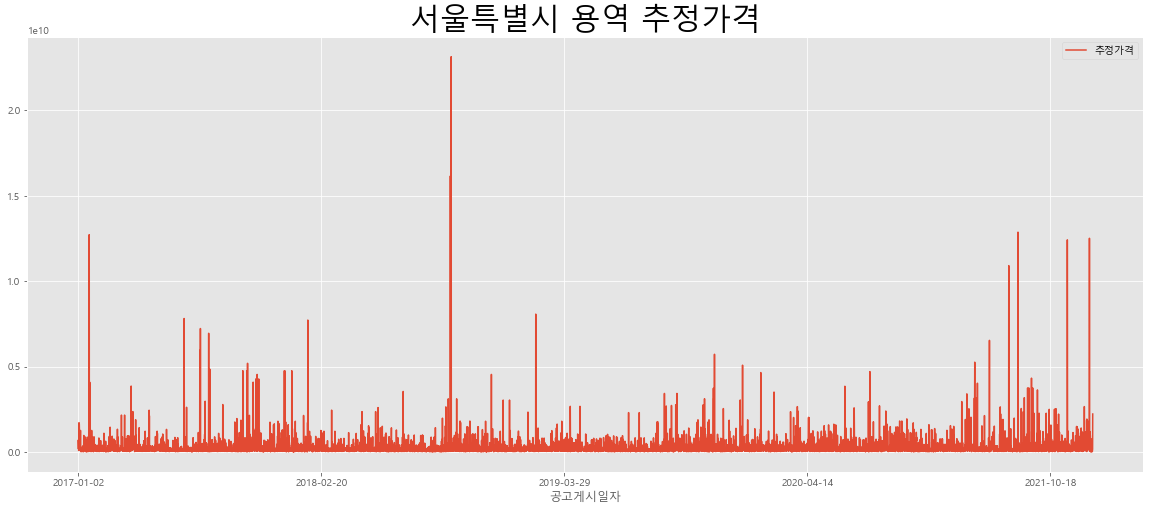

In [42]:
seoul_city_service_price.plot(figsize=(20,8))
plt.title("서울특별시 용역 추정가격",fontsize=30)

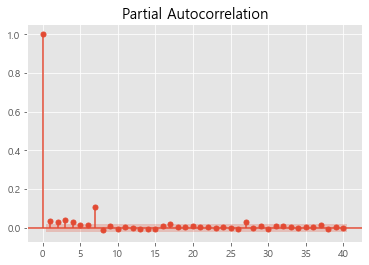

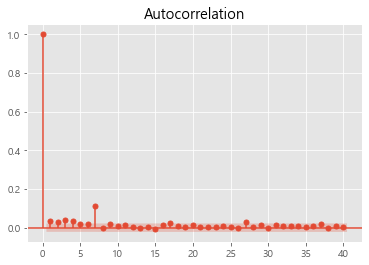

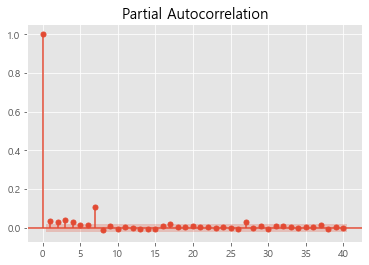

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seoul_city_service_price.추정가격)
plot_pacf(seoul_city_service_price.추정가격)

In [46]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
        
ad_test(seoul_city_service_price['추정가격'])

1. ADF :  -28.70017940207913
2. P-Value :  0.0
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression: 8338
5. Critical Values :
	 1% :  -3.4311345183899213
	 5% :  -2.8618867028509913
	 10% :  -2.5669545450817153


In [45]:
seoul_city_service_price=seoul_city_service_price.dropna()
seoul_city_service_price

,추정가격
공고게시일자,
2017-01-02,218181818.00
2017-01-02,702772727.00
2017-01-02,492190909.00
2017-01-02,367121818.00
2017-01-02,90000000.00
...,...
2021-12-30,26754545.00
2021-12-30,33000000.00
2021-12-31,134545454.00


# 일자별 합계, 일자하나만 존재하도록 함

In [48]:
seoul_city_service_price['date'] = seoul_city_service_price.index
seoul_city_service_price.dtypes

seoul_city_service_price['date'] = seoul_city_service_price['date'].astype(str)

seoul_city_service_price['date'] = pd.to_datetime(seoul_city_service_price['date'])

seoul_groups = seoul_city_service_price.groupby(["date"]).추정가격.sum()
seoul_city_ser_group = pd.DataFrame(data=seoul_groups, index = seoul_groups.index)

seoul_city_ser_group.head()

,추정가격
date,
2017-01-02,2143986362.00
2017-01-03,5353588179.00
2017-01-04,740774544.00
2017-01-05,270909090.00
2017-01-06,1470924389.00


In [114]:
seoul_temp =seoul_city_ser_group

In [117]:
seoul_temp.iloc[500:750]

,추정가격
date,
2018-12-18,2431949999.00
2018-12-19,1248506361.00
2018-12-20,1610879998.00
2018-12-21,2229566362.00
2018-12-24,414107272.00
...,...
2019-12-05,7351931812.00
2019-12-06,5377841812.00
2019-12-09,1256480823.00


In [50]:
seoul_temp.dtypes

추정가격    float64
dtype: object

Text(0.5, 1.0, '서울특별시 용역 추정가격')

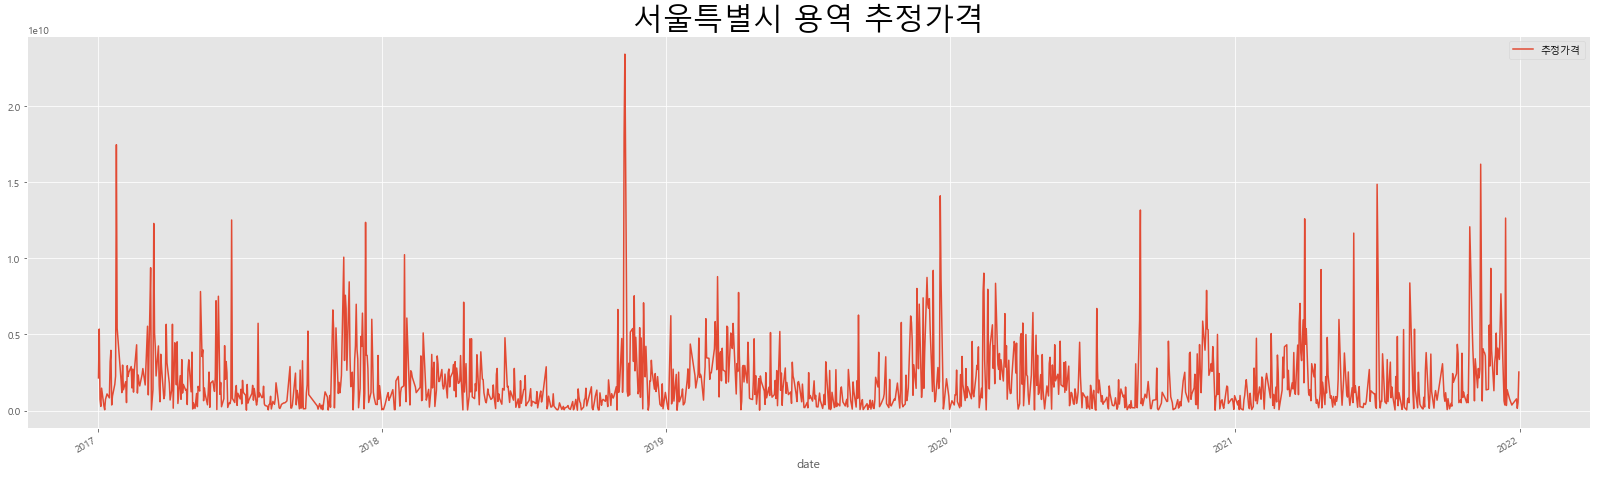

In [51]:
seoul_temp.plot(figsize=(28,8))
plt.title("서울특별시 용역 추정가격",fontsize=30)

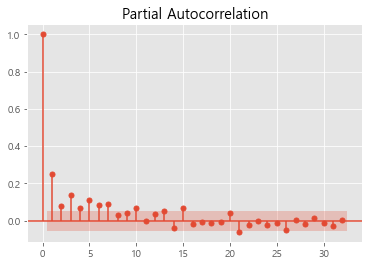

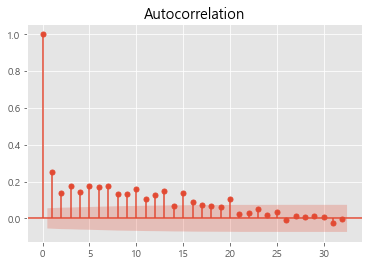

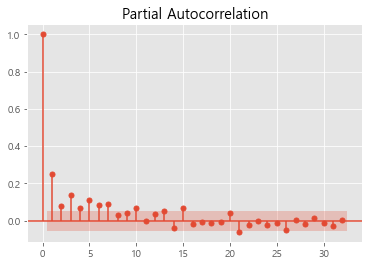

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seoul_temp.추정가격)
plot_pacf(seoul_temp.추정가격)


# 1차/2차 차분

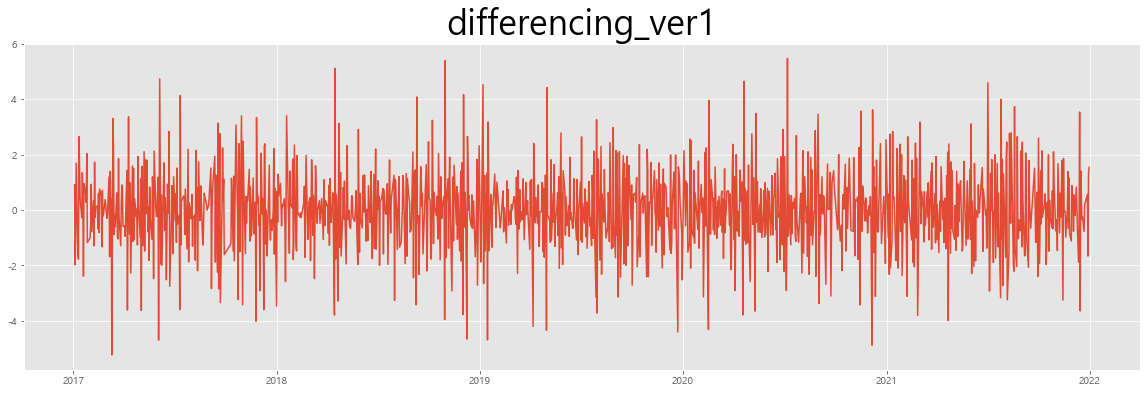

In [28]:
# differencing
#log변환, 차분


fig = plt.figure(figsize=(20,6))
seoul_temp_log = np.log(seoul_temp) 
#plt.plot(seoul_temp) 
#plt.show()
seoul_temp_diff = seoul_temp_log - seoul_temp_log.shift()
plt.plot(seoul_temp_diff)
plt.title("differencing_ver1",fontsize=35)
plt.show()
#seoul_temp

일정한 패턴이 확인되지 않고, 정상성을 만족하는 듯 보인다.
ADF 검정 결과는 다음과 같다.

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(seoul_temp_diff[1:])
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -14.951112
p-value : 0.000000
Critical values:
	1%:-3.436
	5%:-2.864
	10%:-2.568


p-value가 0.05보다 작으므로 귀무가설을 기각. 즉 2차 차분한 데이터는 정상성을 만족한다.

In [35]:
seoul_temp_diff_dropna = seoul_temp_diff.dropna()
seoul_temp_diff_dropna

,추정가격
date,
2017-01-03,0.92
2017-01-04,-1.98
2017-01-05,-1.01
2017-01-06,1.69
2017-01-09,-1.58
...,...
2021-12-23,0.19
2021-12-28,0.57
2021-12-29,-1.66


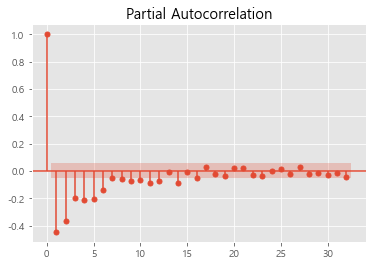

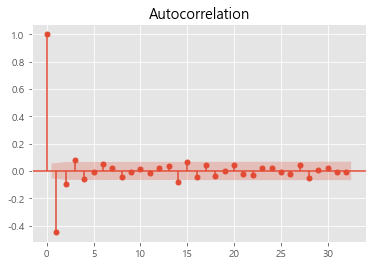

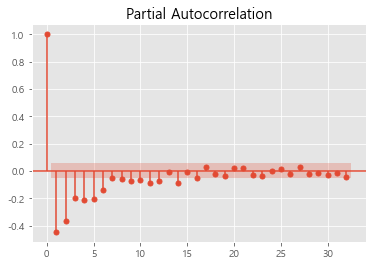

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seoul_temp_diff_dropna.추정가격)
plot_pacf(seoul_temp_diff_dropna.추정가격)


확실히 0에 빨리 수렴하는 것을 볼 수 있다.

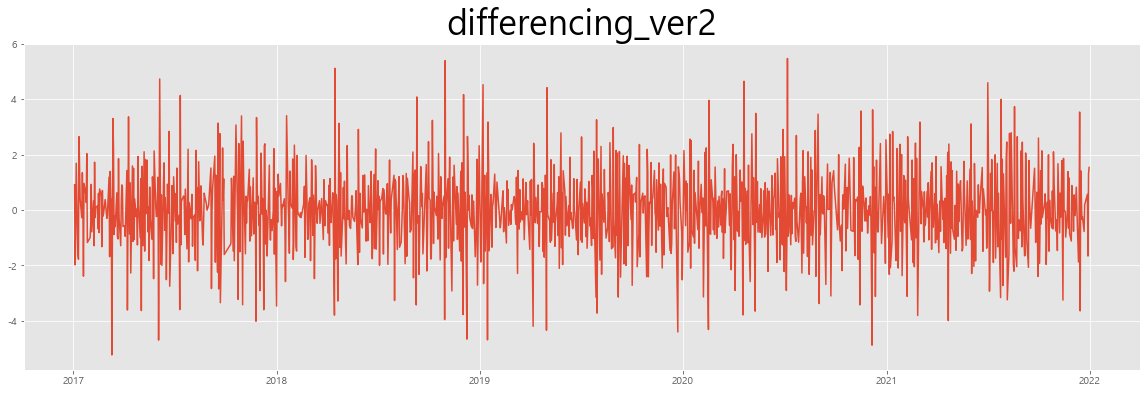

In [32]:
fig = plt.figure(figsize=(20,6))
plt.plot(seoul_temp_diff_dropna)
plt.title("differencing_ver2",fontsize=35)
plt.show()

# differencing_ver1 이랑은 nan값 삭제한거 밖에 차이안남, 거의 똑같다고 보면됨 무튼이게 최종 차분

# 로그변환, 차분한걸로 모델돌려보자 
lag = 50, 50시점 미룬 데이터와의 correlation

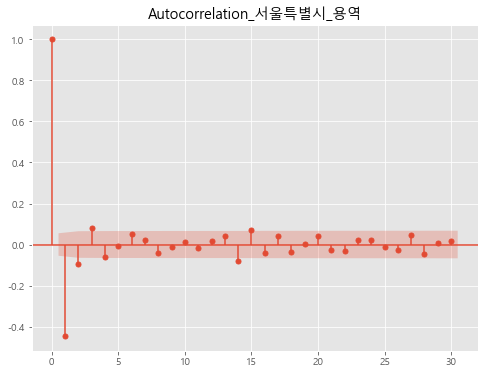

In [29]:
sm.tsa.stattools.acf(seoul_temp_diff[1:], nlags=30, fft=False)
fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot()
sm.graphics.tsa.plot_acf(seoul_temp_diff[1:],lags=30, ax=ax)
plt.title("Autocorrelation_서울특별시_용역")
plt.show()

ACF와 PACF 모두 금방 0에 수렴하고, 5번째 lag 이후 0에 수렴 즉, ARIMA(5,0,0) 등 모델을 시도해볼 수 있다.

<Figure size 1440x432 with 0 Axes>

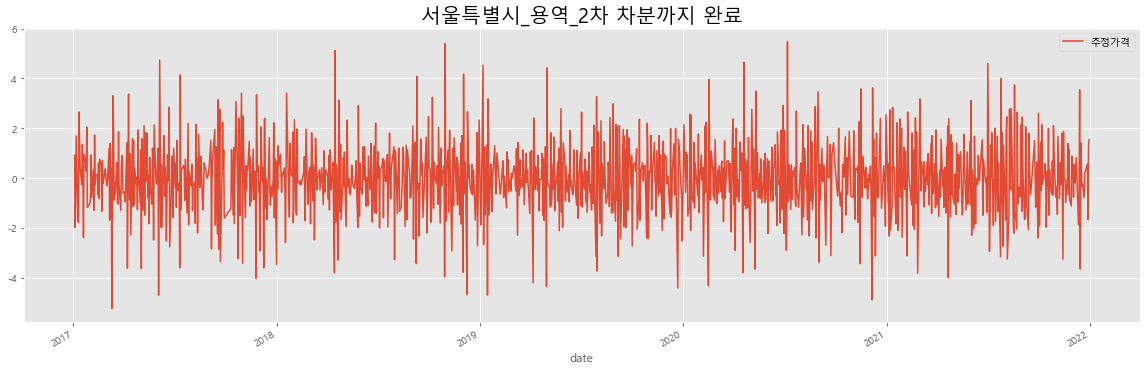

In [30]:
plt.figure(figsize=(20,6))
seoul_temp_diff_dropna.plot(figsize=(20,6))
plt.title("서울특별시_용역_2차 차분까지 완료",fontsize=20)
plt.show()

In [69]:
print(seoul_temp.shape)
train=seoul_temp.iloc[:-900]
test=seoul_temp.iloc[-900:]
print(train.shape,test.shape)

(1278, 1)
(378, 1) (900, 1)


In [90]:
print(seoul_temp.shape)
train=seoul_temp.iloc[:-700]
test=seoul_temp.iloc[-700:]
print(train.shape,test.shape)

(1278, 1)
(578, 1) (700, 1)


In [113]:
test

,추정가격
date,
2019-04-12,2958838179.00
2019-04-15,1810592726.00
2019-04-16,4488589087.00
2019-04-17,3036270901.00
2019-04-18,812769090.00
...,...
2021-12-23,432485452.00
2021-12-28,765483636.00
2021-12-29,145454545.00


## 모델 훈련 : seoul_temp_diff_dropna['추정가격']

In [92]:
from pmdarima import auto_arima
seoul_city_service_price_fit = auto_arima(train, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=26510.604, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26575.738, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=26530.971, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26536.730, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26893.496, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=26529.400, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26531.440, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=26512.050, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=26510.337, Time=0.60 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=26518.806, Time=0.26 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=26503.962, Time=1.71 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=26505.873, Time=1.55 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=26504.622, Time=1.82 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=26508.576, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0

In [93]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train, order=(4,0,4))
model_fit=model.fit(disp=0)#(trend='nc',full_output=True, disp=True)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   추정가격   No. Observations:                  578
Model:                     ARMA(4, 4)   Log Likelihood              -13239.262
Method:                       css-mle   S.D. of innovations     2136487381.636
Date:                Tue, 15 Feb 2022   AIC                          26498.524
Time:                        01:49:38   BIC                          26542.120
Sample:                             0   HQIC                         26515.523
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.998e+09   2.82e+08      7.076      0.000    1.44e+09    2.55e+09
ar.L1.추정가격     0.6518      0.089      7.290      0.000       0.477       0.827
ar.L2.추정가격    -0.2833      0.124     -2.281      0.0

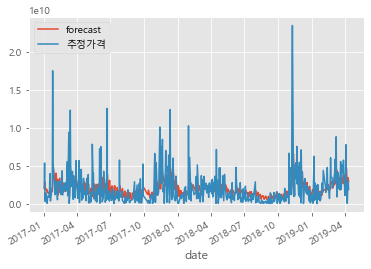

In [109]:
predic=model_fit.plot_predict(dynamic=False)
plt.show()

In [60]:
from pandas import datetime
# Predict
start_index = datetime(2022,1,1)
end_index = datetime(2022,5,30)
forcast_test = model_fit.predict(start=start_index, end=end_index,typ='levels') # 이부분 이상한듯 이따 다시 보기

# Plot
# plt.figure(figsize=(22,8), dpi=150)
# plt.plot(seoul_temp, label='solid ticket')
# plt.plot(forcast, label='forecast_predict')
# plt.title('Forecast')
# plt.legend(loc='upper right', fontsize=8)
# plt.show()







from datetime import datetime, timedelta
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

dates = date_range("2022-01-01", "2022-05-30")
print(dates)
# Forecast
fc, se, conf = model_fit.forcast_test(150, alpha =0.05) # 95% conf



# Make as pandas series
fc_series = pd.Series(fc,index=dates)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(seoul_temp, label='solid ticket')
plt.plot(fc_series.index, fc_series.values, label='forecast_predict')

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

NameError: name 'forcast_test' is not defined

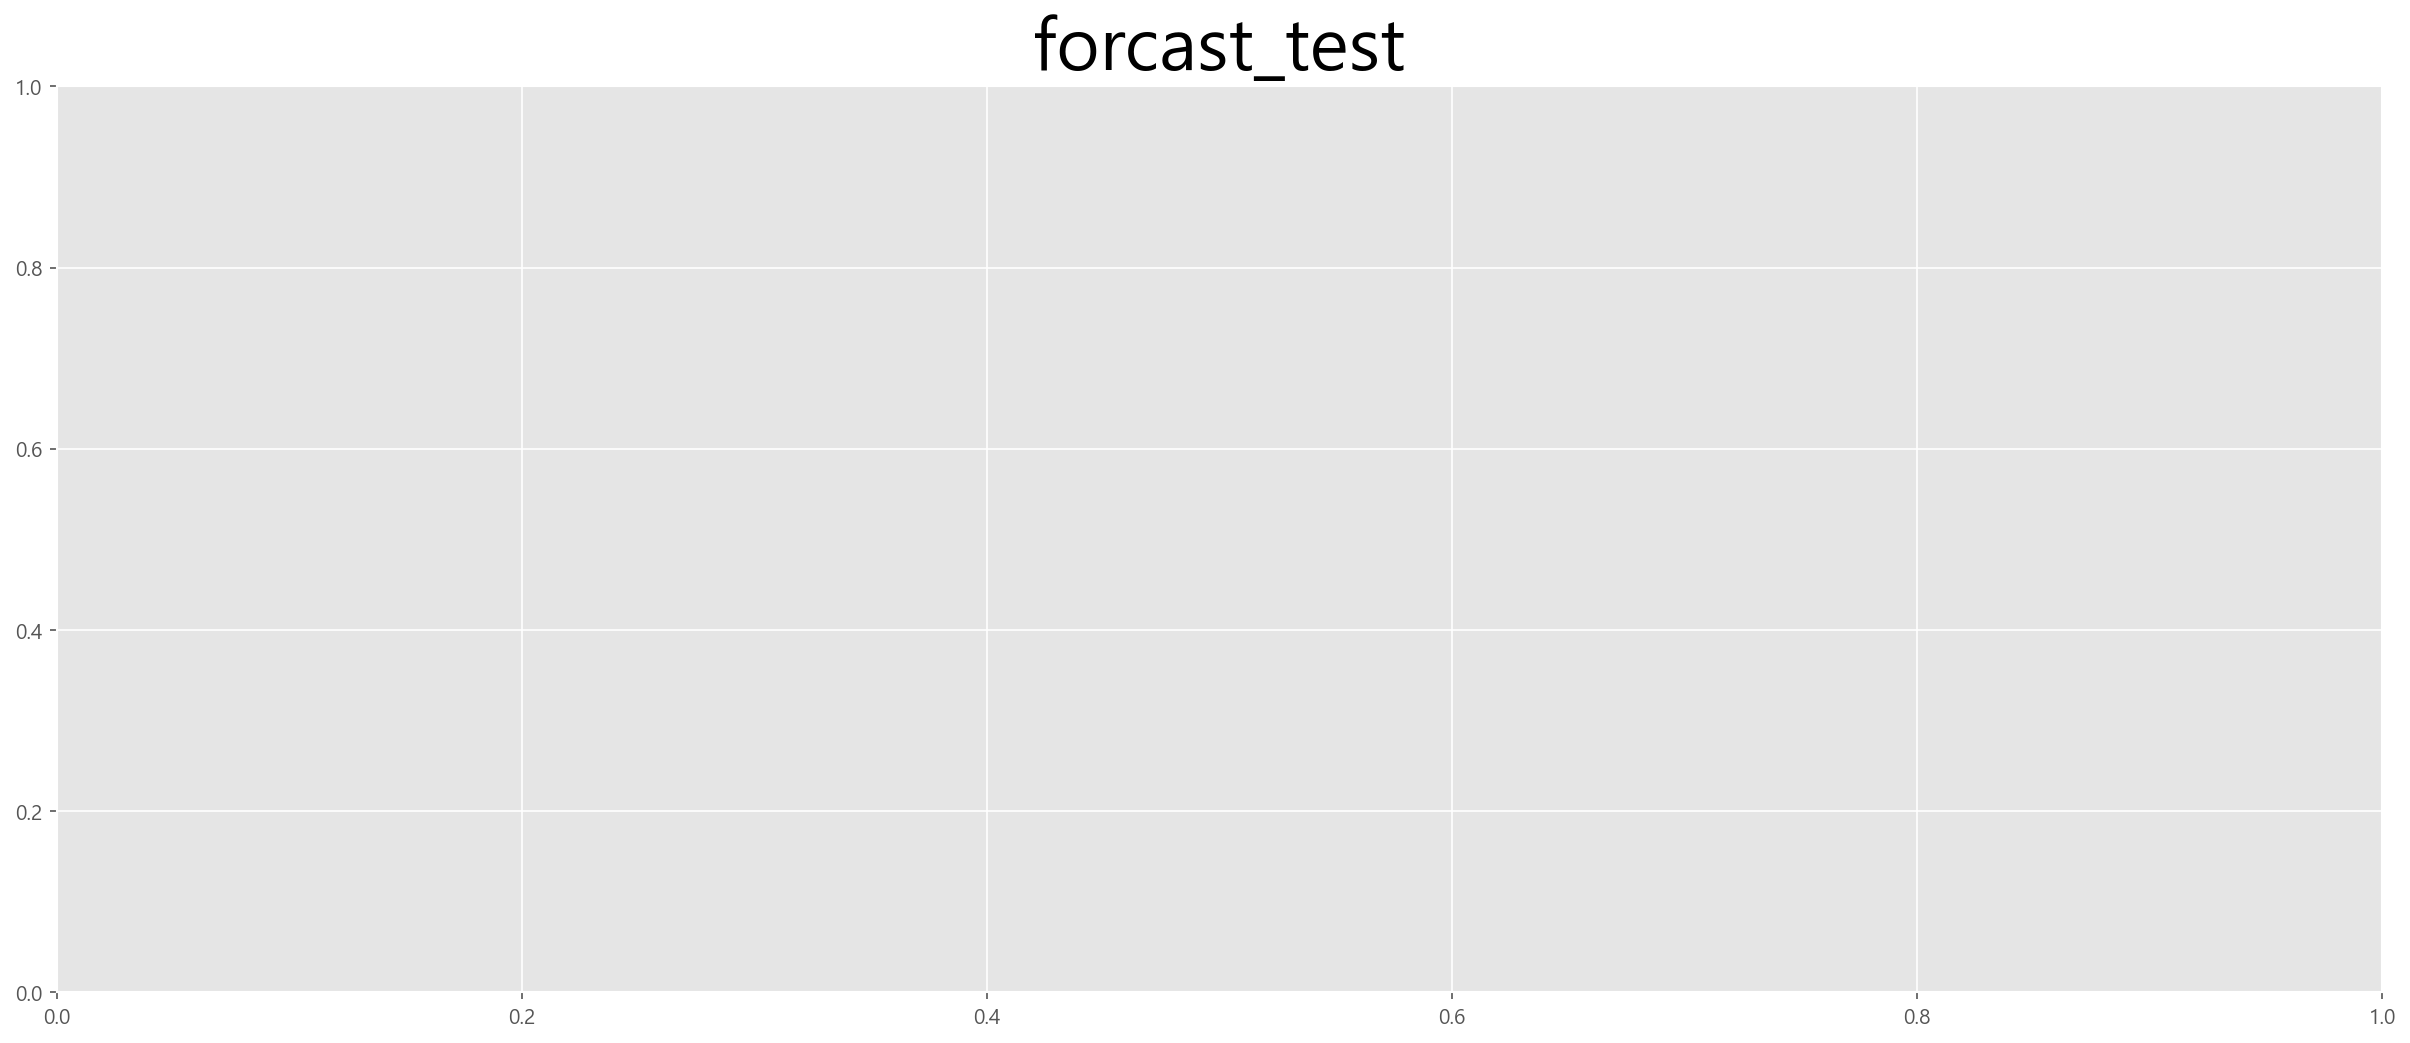

In [61]:
plt.figure(figsize=(20,8), dpi=150)
plt.title('forcast_test',fontsize=35) 
plt.plot(forcast_test, label='forecast_predict')
plt.plot(seoul_temp, label='solid ticket')
plt.legend(loc='upper right', fontsize=15)
plt.show()

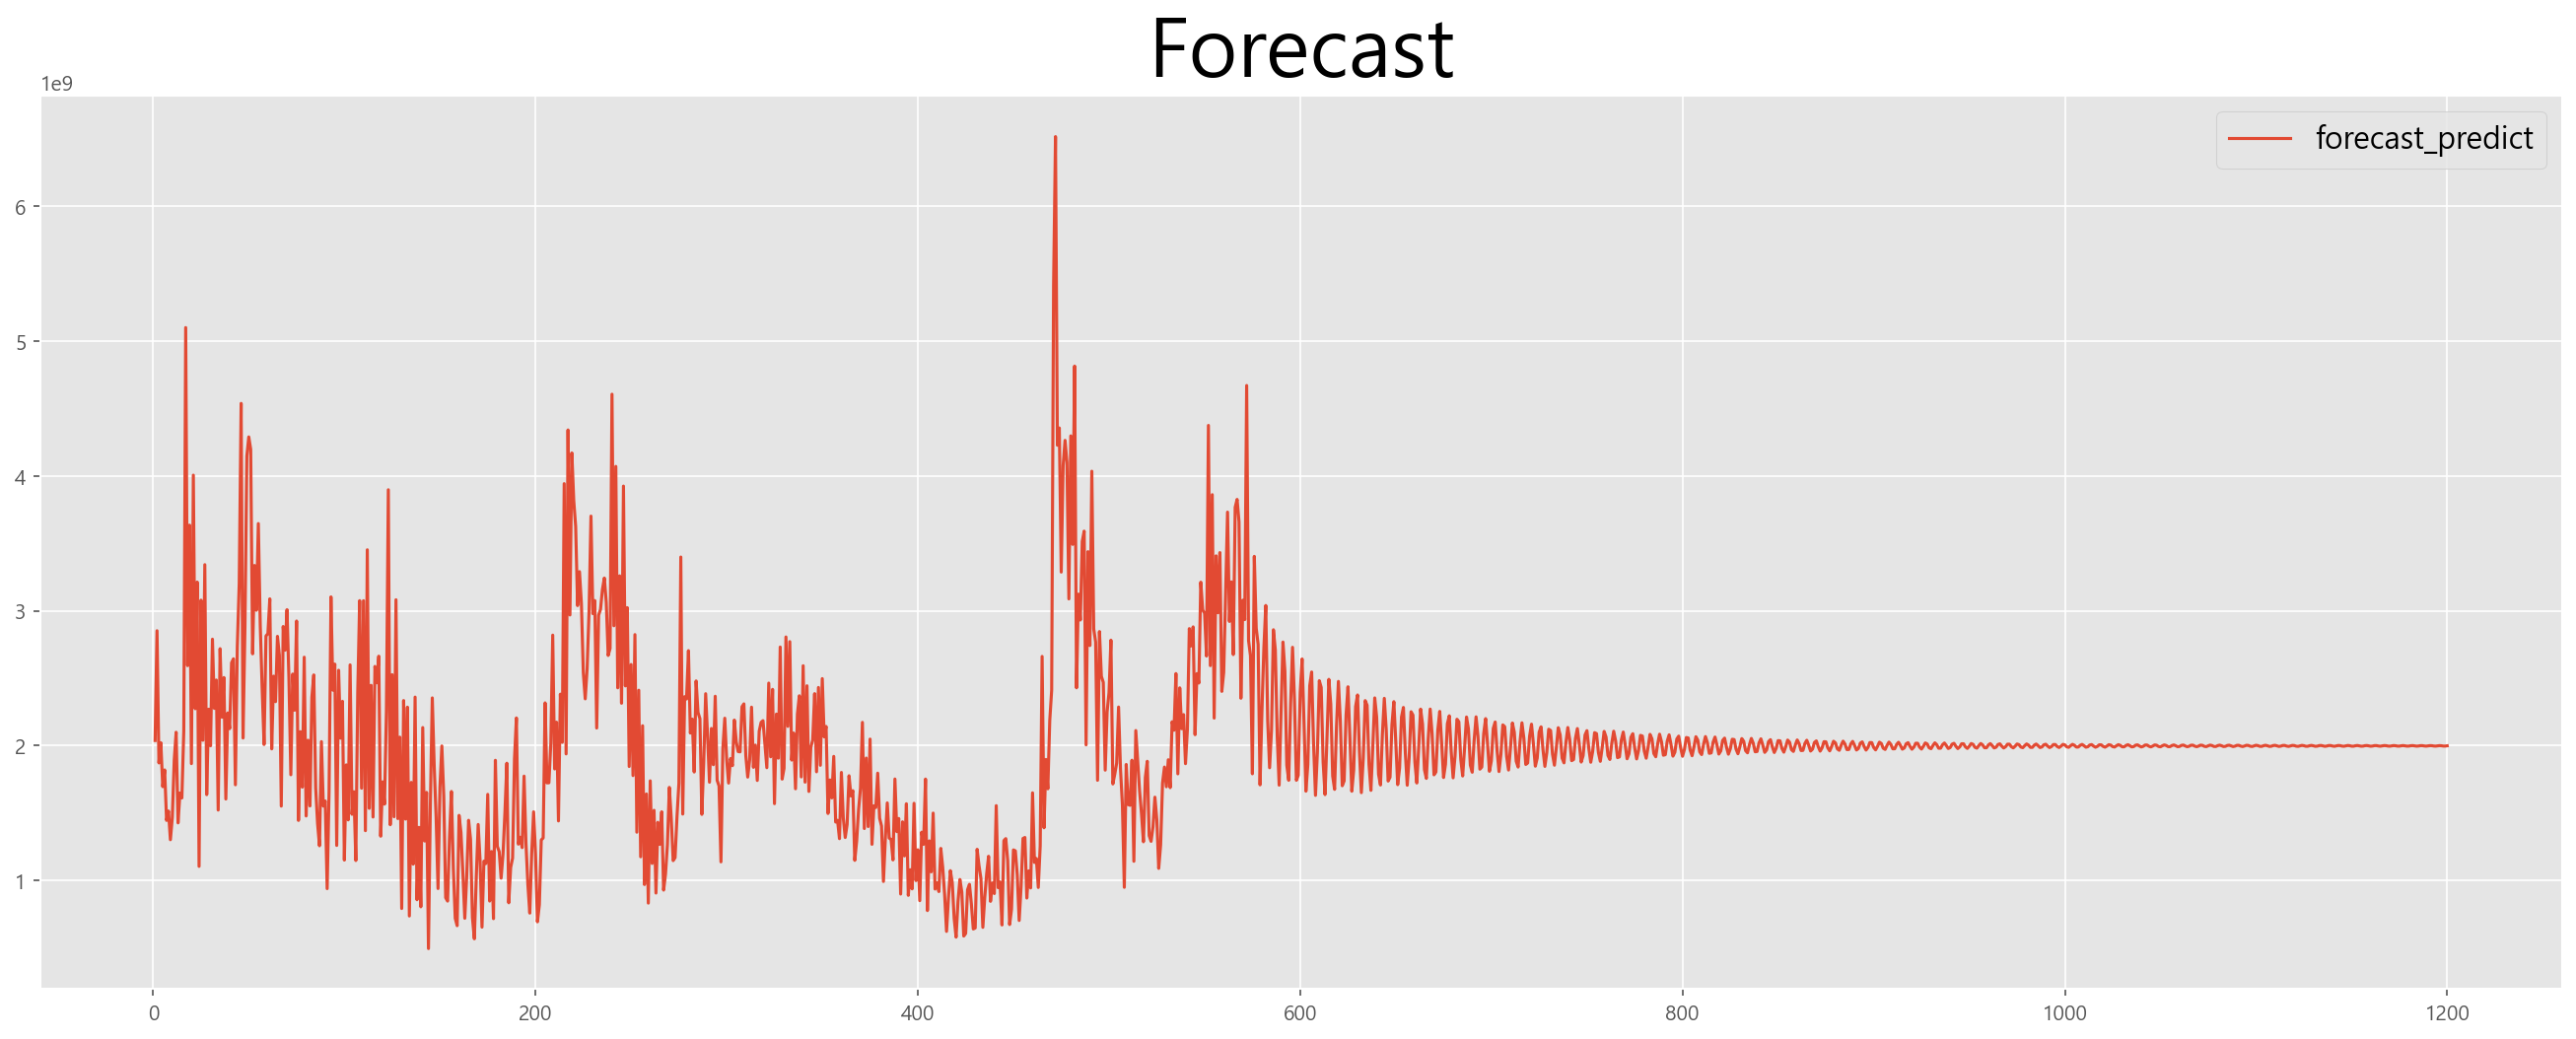

In [126]:
from pandas import datetime
#model = ARIMA(seoul_temp, order=(4,2,0))  
#model_fit = model.fit(disp=0)  

# Predict
#start_index = datetime(2017,3,23)
#end_index = datetime(2019,5,14)
forcast = model_fit.predict(1,1200 ,typ='levels')

# Plot
plt.figure(figsize=(22,8), dpi=150)
#plt.plot(seoul_temp, label='solid ticket')
plt.plot(forcast, label='forecast_predict')
plt.title('Forecast',fontsize=40)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [121]:
from pandas import datetime
#model = ARIMA(seoul_temp, order=(5,2,0))  
#model_fit = model.fit(disp=0)  

# Predict
#start_index = datetime(2018,12,18)
#end_index = datetime(2019,12,11)
forcast = model_fit.predict(580, 01, typ='levels')

# Plot
plt.figure(figsize=(22,8), dpi=150)
plt.plot(seoul_temp, label='solid ticket')
plt.plot(forcast, label='forecast_predict')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=15)
plt.show()

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

<AxesSubplot:>

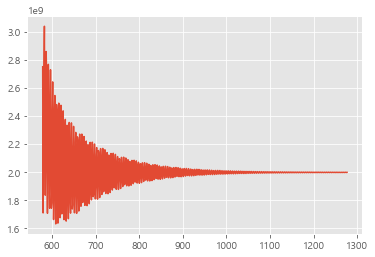

In [123]:
predictions = model_fit.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1), dynamic=False)
predictions.plot()

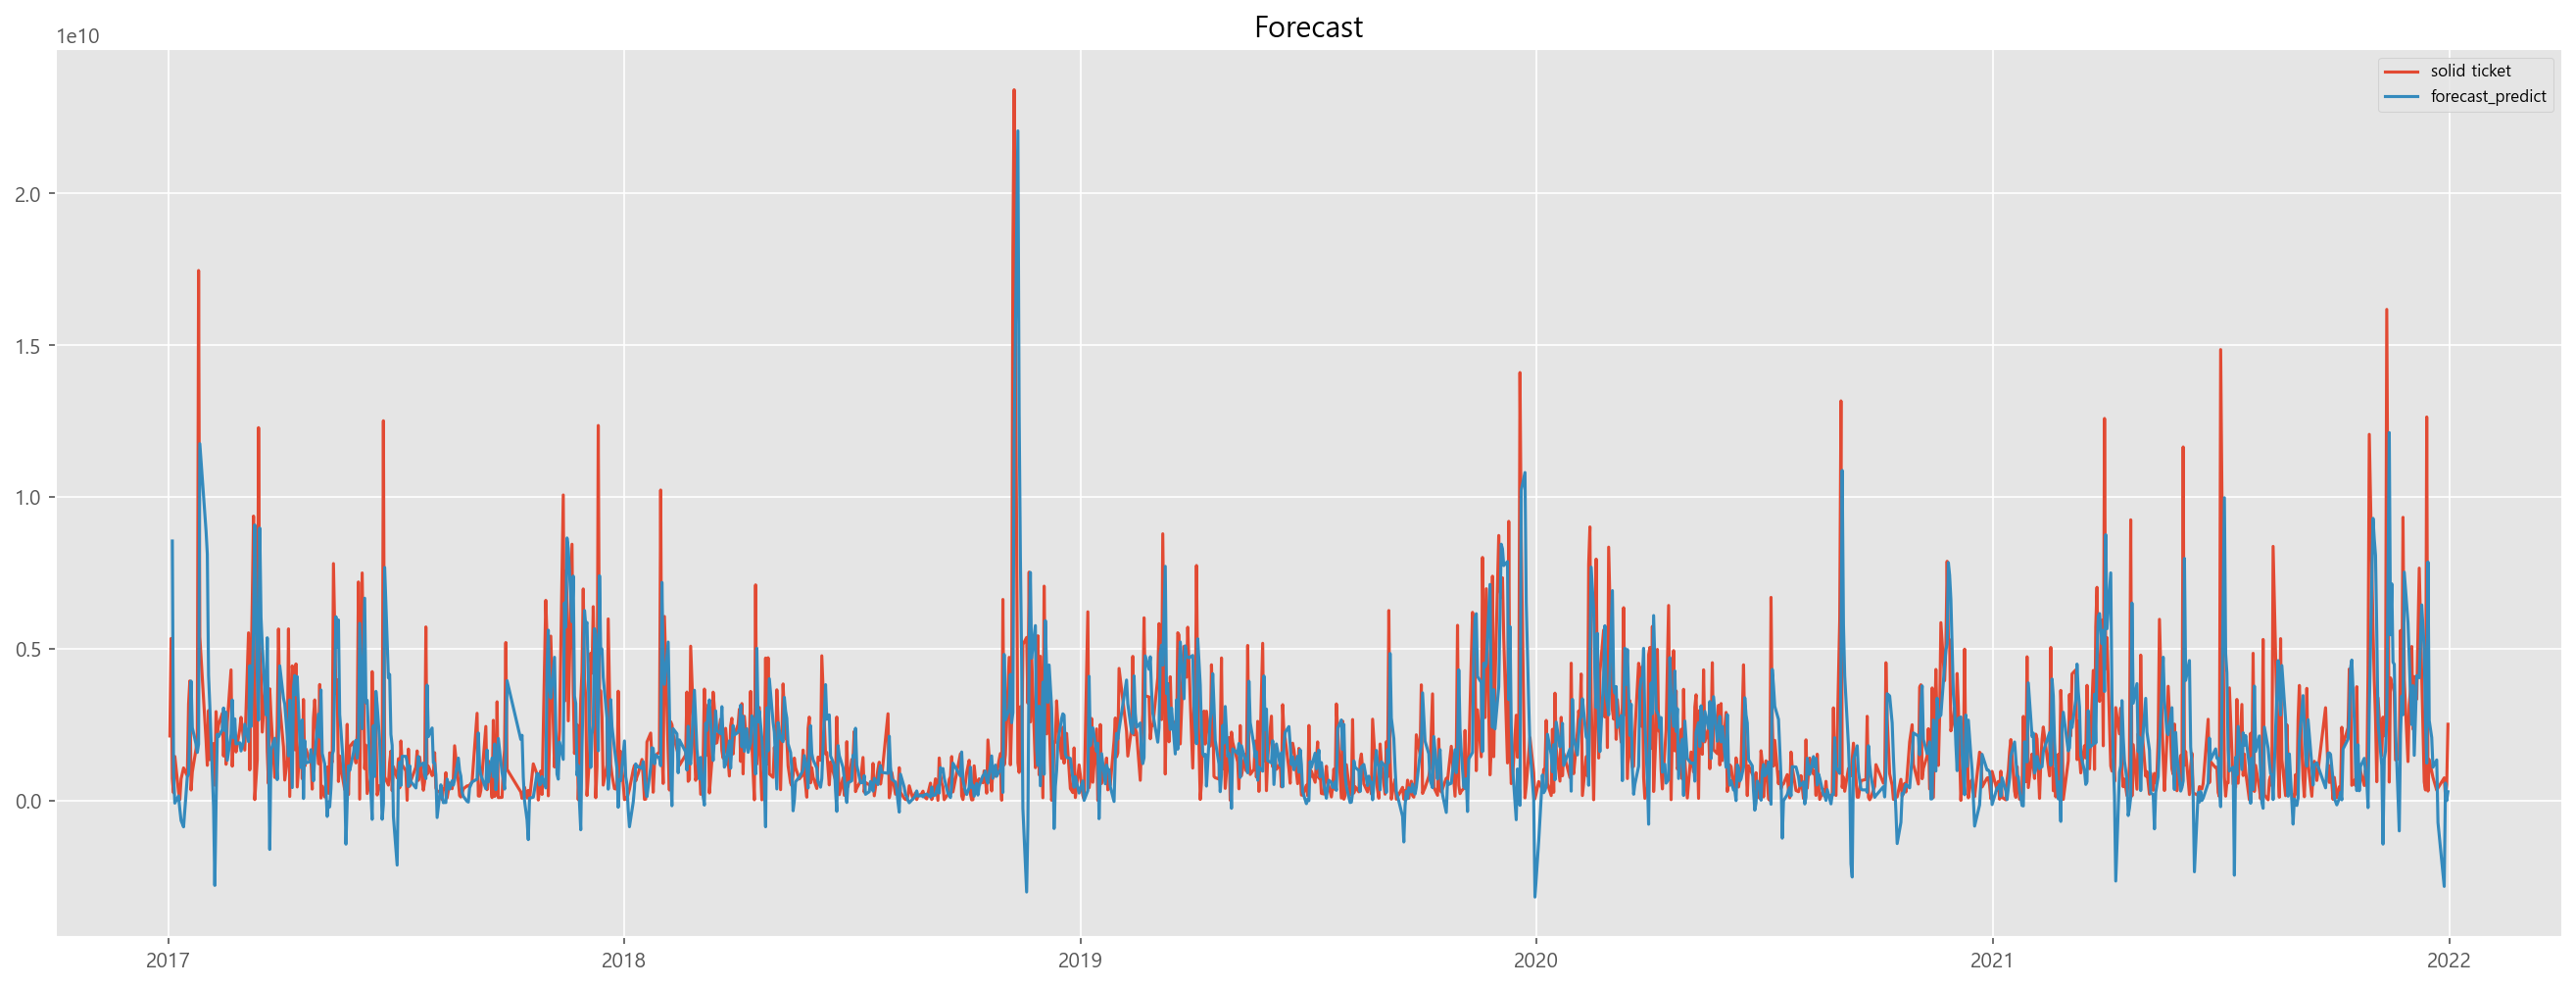

In [393]:
from pandas import datetime
#model = ARIMA(seoul_temp, order=(5,2,0))  
#model_fit = model.fit(disp=0)  

# Predict
start_index = datetime(2017,1,4)
end_index = datetime(2021,12,31)
forcast = model_fit.predict(start=start_index, end=end_index,typ='levels')

# Plot
plt.figure(figsize=(22,8), dpi=150)
plt.plot(seoul_temp, label='solid ticket')
plt.plot(forcast, label='forecast_predict')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

### 일단 위의 결과는 눈으로 볼 때 결과가 괜찮아 보인다?..
## 마지막으로 잔차 분석을 통해 모델에 빠진 것이 없는 지, 문제가 없는지 확인한다.

# 잔차는 어떠한 패턴이나 특성이 나타나서는 안된다.
어떤 패턴이 있다는 것은 모델에 그만큼 덜 적용이 되었다는 것을 의미하기 때문이다.

No handles with labels found to put in legend.


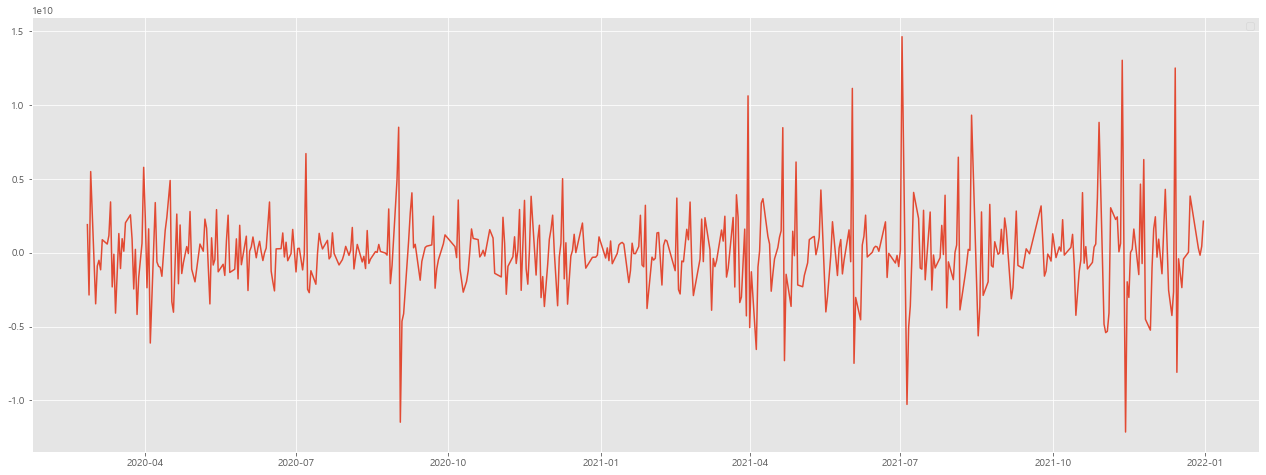

In [82]:
resi = np.array(seoul_temp[seoul_temp.index>=start_index].추정가격) - np.array(forcast)

plt.figure(figsize=(22,8))
plt.plot(seoul_temp.index[seoul_temp.index>=start_index], resi)
#plt.xlabel("Date")
#plt.ylabel("Price")
plt.legend()
plt.show()

# ACF 그래프 및 ADF 검정을 통해 정상성도 판단한다.

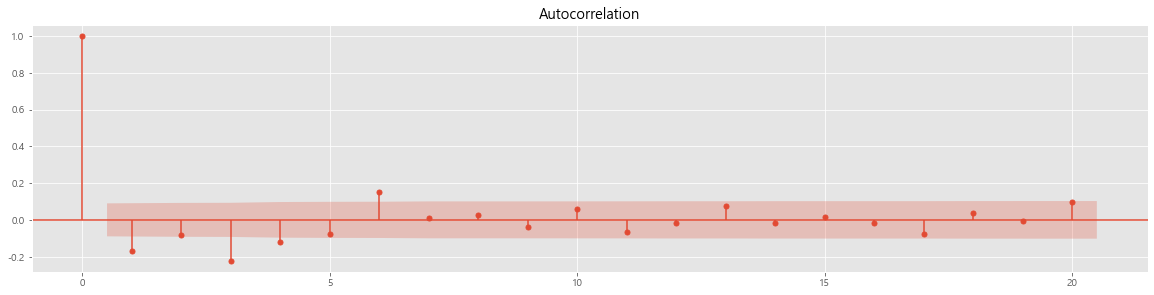

In [83]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resi, lags=20, ax=ax1)

# ACF 그래프도 빠르게 0으로 수렴하고, ADF 검정 역시 P-value 값이 매우 작은 것을 볼 수 있다.

In [84]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(resi)
print('ADF Statistic: %f'%result[0])
print('p-value : %f'%result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic: -10.352990
p-value : 0.000000
Critical values:
	1%:-3.445
	5%:-2.868
	10%:-2.570


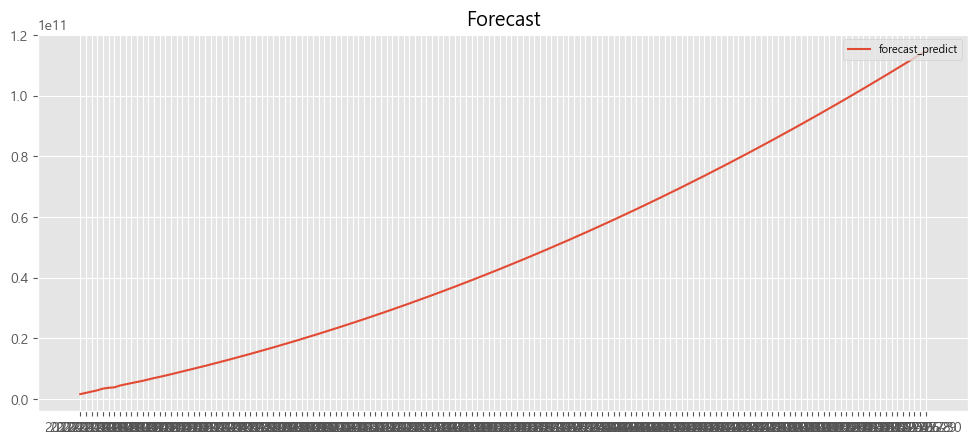

In [88]:
model = ARIMA(seoul_temp.iloc[900:], order=(5,2,0))  
model_fit = model.fit(disp=0)  


# Predict
# start_index = datetime(2022,1,1)
# end_index = datetime(2022,2,28)
# start=start_index
# end=end_index



# Forecast
fc, se, conf = model_fit.forecast(150, alpha =0.05) # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,index=dates)

# Plot
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(seoul_temp, label='solid ticket')
plt.plot(fc_series.index, fc_series.values, label='forecast_predict')
plt.title('Forecast')
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [86]:
from datetime import datetime, timedelta
def date_range(start, end):
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

dates = date_range("2022-01-01", "2022-05-30")
print(dates)

['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022

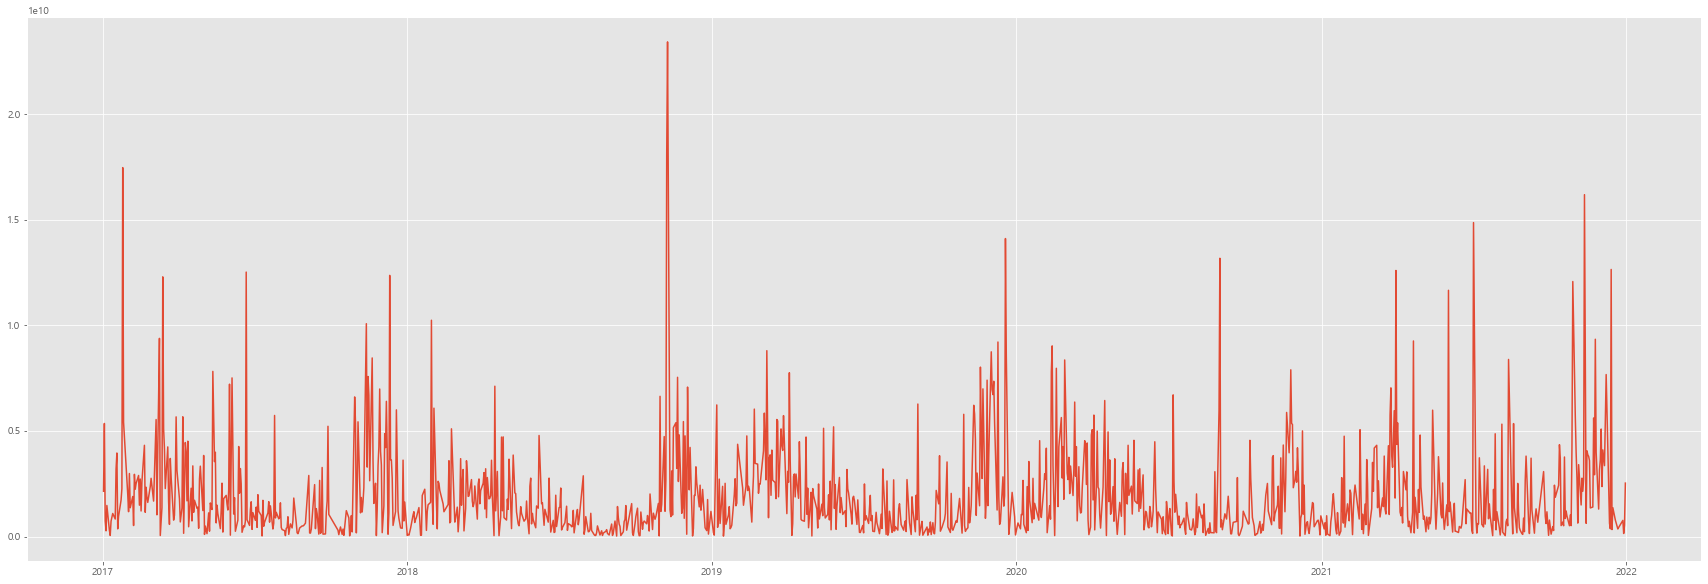

In [89]:
plt.figure(figsize=(30,10))
plt.plot(seoul_temp, label='solid ticket')
plt.rc('xtick', labelsize=10)

<AxesSubplot:>

<Figure size 1440x504 with 0 Axes>

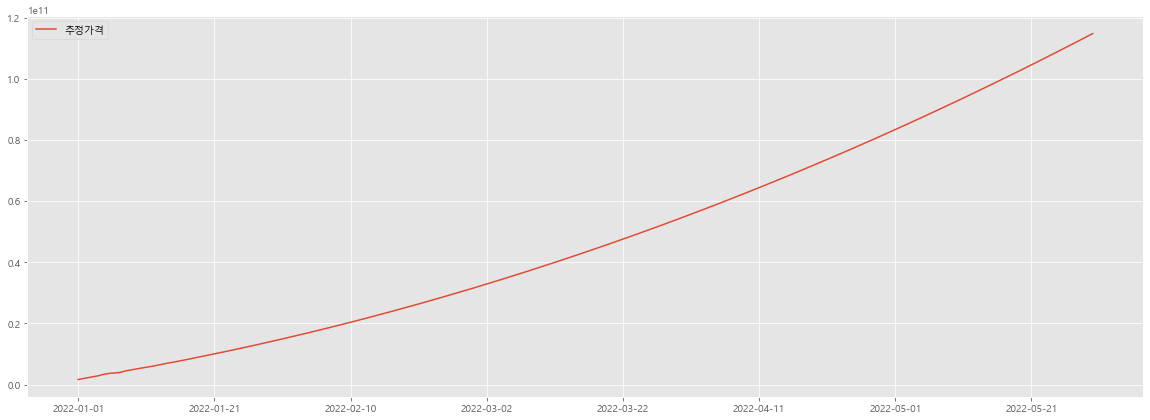

In [465]:
co_n = ['추정가격']
fc_data = pd.DataFrame(data=fc_series,columns=co_n)
plt.figure(figsize=(20,7))
fc_data.plot(figsize=(20,7))

In [468]:
fc_data[50:70] # 좀 이상..

,추정가격
2022-02-20,26355275771.81
2022-02-21,26983363621.64
2022-02-22,27616855533.55
2022-02-23,28255760551.34
2022-02-24,28900074088.82
2022-02-25,29549787512.65
2022-02-26,30204902466.39
2022-02-27,30865424453.25
2022-02-28,31531353879.71
2022-03-01,32202688153.40


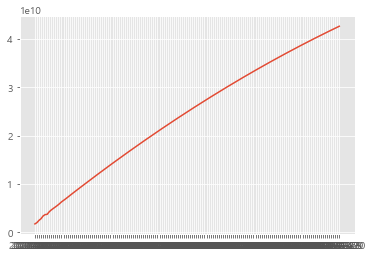

In [435]:
plt.plot(fc_series.index, fc_series.values, label='forecast_predict')
plt.show()